In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns
from pandas.plotting import autocorrelation_plot
sns.set()

In [2]:
# importing the data
raw_csv_data = pd.read_csv("Data-Chillers.csv")

In [3]:
df_comp = raw_csv_data.copy()

In [4]:
df_comp.head()

,time,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
0,29-08-2017 11:00,-0.015871,0.353986,-0.787655,0.008144
1,29-08-2017 12:00,-0.101576,0.353986,-0.787655,-0.029860
2,29-08-2017 13:00,-0.118241,0.353986,-0.787655,-0.021717
3,29-08-2017 14:00,-0.214262,0.353986,-0.787655,0.008144
4,29-08-2017 15:00,-0.249972,0.353986,-0.787655,-0.108583


In [5]:
df_comp.isna().sum()

time                  0
IOT_Sensor_Reading    0
Error_Present         0
Sensor_2              0
Sensor_Value          0
dtype: int64

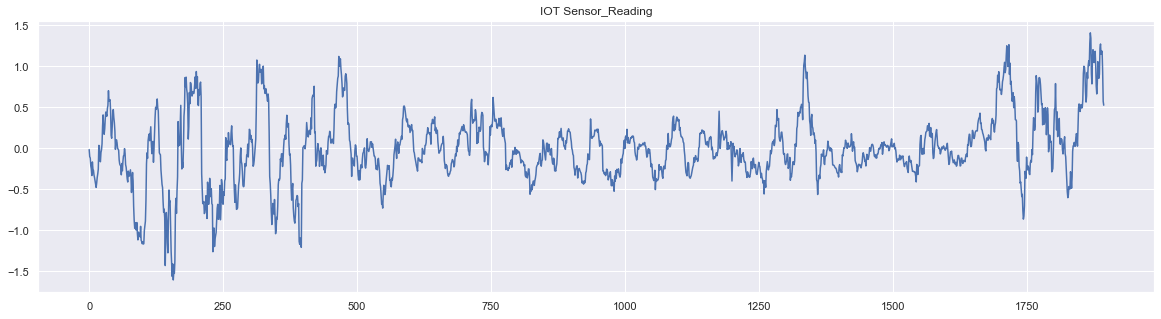

In [6]:
df_comp.IOT_Sensor_Reading.plot(figsize=(20,5), title="IOT Sensor_Reading")
plt.show()

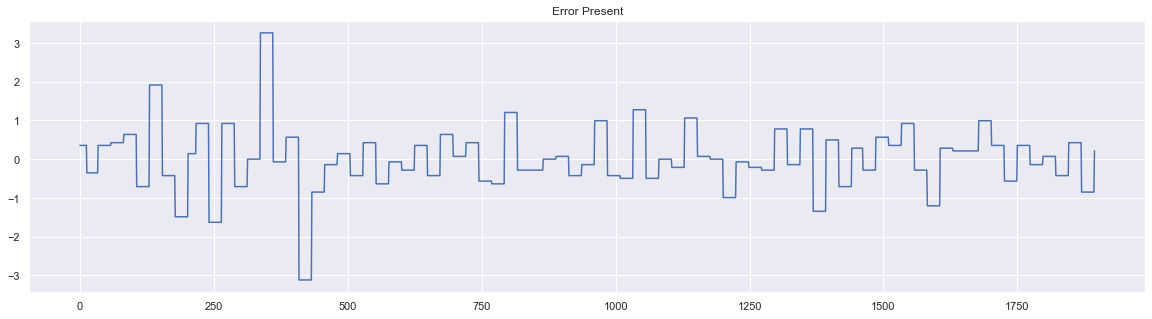

In [7]:
df_comp.Error_Present.plot(figsize=(20,5), title="Error Present")
plt.show()

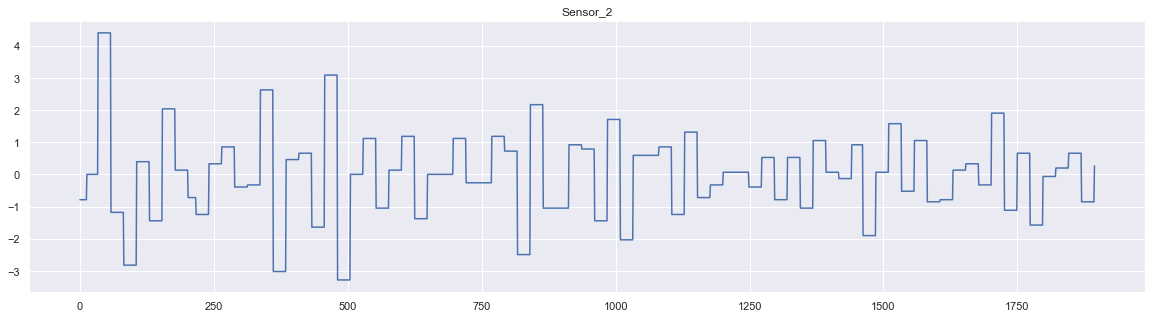

In [8]:
df_comp.Sensor_2.plot(figsize=(20,5), title="Sensor_2")
plt.show()

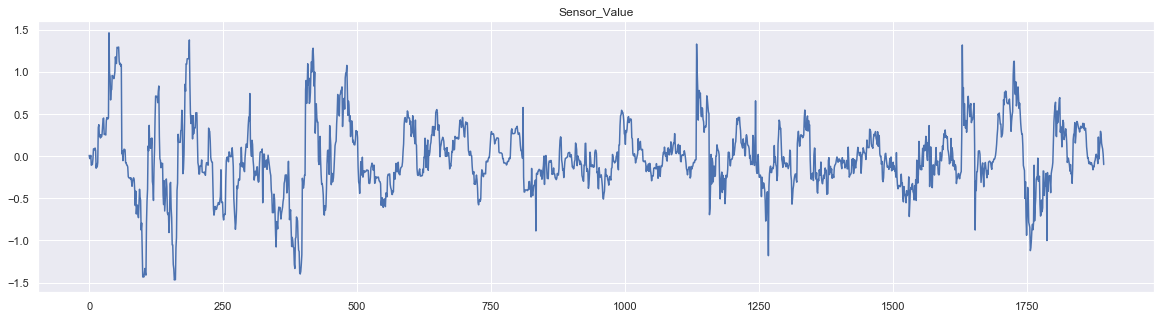

In [9]:
df_comp.Sensor_Value.plot(figsize=(20,5), title="Sensor_Value")
plt.show()

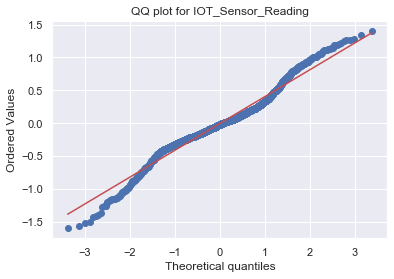

In [10]:
# The QQ plot
scipy.stats.probplot(df_comp.IOT_Sensor_Reading, plot=pylab)
plt.title("QQ plot for IOT_Sensor_Reading")
pylab.show()

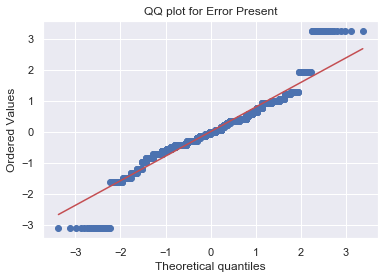

In [11]:
# The QQ plot
scipy.stats.probplot(df_comp.Error_Present, plot=pylab)
plt.title("QQ plot for Error Present")
pylab.show()

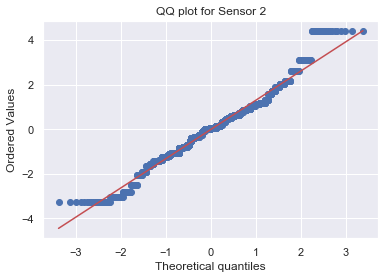

In [12]:
# The QQ plot
scipy.stats.probplot(df_comp.Sensor_2, plot=pylab)
plt.title("QQ plot for Sensor 2")
pylab.show()

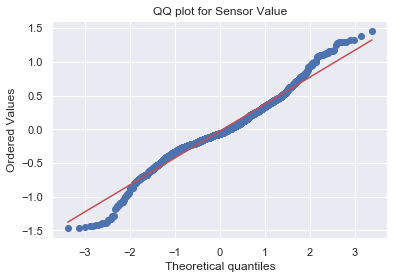

In [13]:
# The QQ plot
scipy.stats.probplot(df_comp.Sensor_Value, plot=pylab)
plt.title("QQ plot for Sensor Value")
pylab.show()

# From Text to Date

In [14]:
df_comp.time.describe()

count                 1895
unique                1895
top       01-11-2017 10:00
freq                     1
Name: time, dtype: object

In [15]:
df_comp.time = pd.to_datetime(df_comp.time, format='%d-%m-%Y %H:%M')

In [16]:
df_comp.head()

,time,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
0,2017-08-29 11:00:00,-0.015871,0.353986,-0.787655,0.008144
1,2017-08-29 12:00:00,-0.101576,0.353986,-0.787655,-0.029860
2,2017-08-29 13:00:00,-0.118241,0.353986,-0.787655,-0.021717
3,2017-08-29 14:00:00,-0.214262,0.353986,-0.787655,0.008144
4,2017-08-29 15:00:00,-0.249972,0.353986,-0.787655,-0.108583


In [17]:
df_comp.time.describe()

count                    1895
unique                   1895
top       2017-10-19 05:00:00
freq                        1
first     2017-08-29 11:00:00
last      2017-11-17 00:00:00
Name: time, dtype: object

In [18]:
## Setting the index
df_comp.set_index("time", inplace=True)

In [19]:
df_comp

,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
time,,,,
2017-08-29 11:00:00,-0.015871,0.353986,-0.787655,0.008144
2017-08-29 12:00:00,-0.101576,0.353986,-0.787655,-0.029860
2017-08-29 13:00:00,-0.118241,0.353986,-0.787655,-0.021717
2017-08-29 14:00:00,-0.214262,0.353986,-0.787655,0.008144
2017-08-29 15:00:00,-0.249972,0.353986,-0.787655,-0.108583
...,...,...,...,...
2017-11-16 20:00:00,1.186376,-0.849566,-0.853293,0.152016
2017-11-16 21:00:00,1.182408,-0.849566,-0.853293,0.114012
2017-11-16 22:00:00,0.934023,-0.849566,-0.853293,0.084152


## Setting the desired frequency

In [20]:
df_comp.asfreq('H')

,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
time,,,,
2017-08-29 11:00:00,-0.015871,0.353986,-0.787655,0.008144
2017-08-29 12:00:00,-0.101576,0.353986,-0.787655,-0.029860
2017-08-29 13:00:00,-0.118241,0.353986,-0.787655,-0.021717
2017-08-29 14:00:00,-0.214262,0.353986,-0.787655,0.008144
2017-08-29 15:00:00,-0.249972,0.353986,-0.787655,-0.108583
...,...,...,...,...
2017-11-16 20:00:00,1.186376,-0.849566,-0.853293,0.152016
2017-11-16 21:00:00,1.182408,-0.849566,-0.853293,0.114012
2017-11-16 22:00:00,0.934023,-0.849566,-0.853293,0.084152


In [21]:
df_comp = df_comp.asfreq('H')

## Handling the missing values

In [22]:
df_comp.isna().sum()

IOT_Sensor_Reading    15
Error_Present         15
Sensor_2              15
Sensor_Value          15
dtype: int64

In [23]:
df_comp.IOT_Sensor_Reading = df_comp.IOT_Sensor_Reading.fillna(method='ffill')

In [24]:
df_comp.Error_Present = df_comp.Error_Present.fillna(method='bfill')

In [25]:
df_comp.Sensor_2 = df_comp.Sensor_2.fillna(method='bfill')

In [26]:
df_comp.Sensor_Value = df_comp.Sensor_Value.fillna(value=df_comp.Sensor_Value.mean())

## Simplifying the dataset

In [27]:
df_comp.isna().sum()

IOT_Sensor_Reading    0
Error_Present         0
Sensor_2              0
Sensor_Value          0
dtype: int64

In [28]:
df_comp["IOT_Reading"] = df_comp.IOT_Sensor_Reading

In [29]:
df_comp.describe()

,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value,IOT_Reading
count,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000
mean,-0.003482,0.004300,-0.013471,-0.026563,-0.003482
std,0.416235,0.817652,1.320546,0.403473,0.416235
min,-1.603790,-3.115077,-3.281895,-1.468581,-1.603790
25%,-0.222198,-0.424783,-0.853293,-0.230738,-0.222198
50%,-0.020236,0.000000,0.065638,-0.061078,-0.020236
75%,0.191844,0.424783,0.787655,0.206307,0.191844
max,1.406987,3.256671,4.397739,1.460437,1.406987


In [30]:
del df_comp['IOT_Sensor_Reading']
del df_comp['Error_Present']
del df_comp['Sensor_2']
del df_comp['Sensor_Value']

## White Noise

In [31]:
# Sample White Noise
wn = np.random.normal(loc=df_comp.IOT_Reading.mean(), scale=df_comp.IOT_Reading.std(), size=len(df_comp))

In [32]:
df_comp["wn"] = wn

In [33]:
df_comp.describe()

,IOT_Reading,wn
count,1910.000000,1910.000000
mean,-0.003482,-0.018360
std,0.416235,0.428082
min,-1.603790,-1.769054
25%,-0.222198,-0.307315
50%,-0.020236,-0.007784
75%,0.191844,0.261518
max,1.406987,1.519469


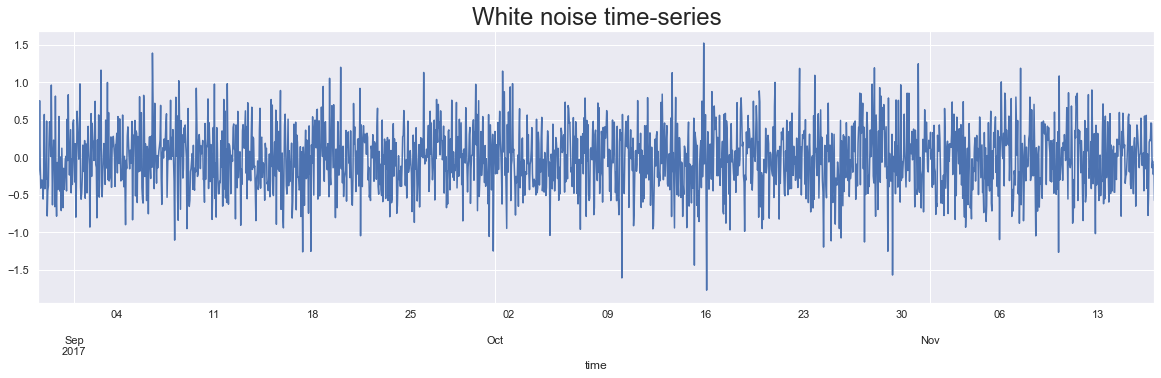

In [34]:
df_comp.wn.plot(figsize=(20,5))
plt.title("White noise time-series", size=24)
plt.show()

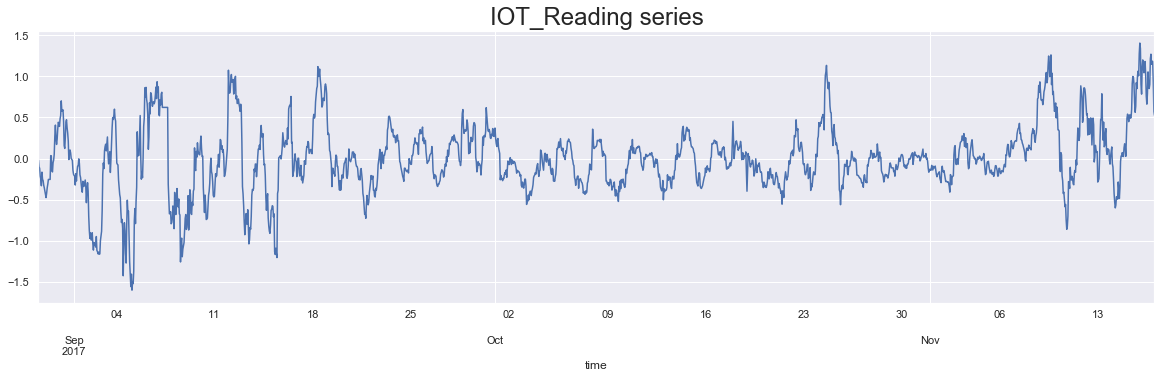

In [35]:
df_comp.IOT_Reading.plot(figsize=(20,5))
plt.title("IOT_Reading series", size=24)
plt.show()

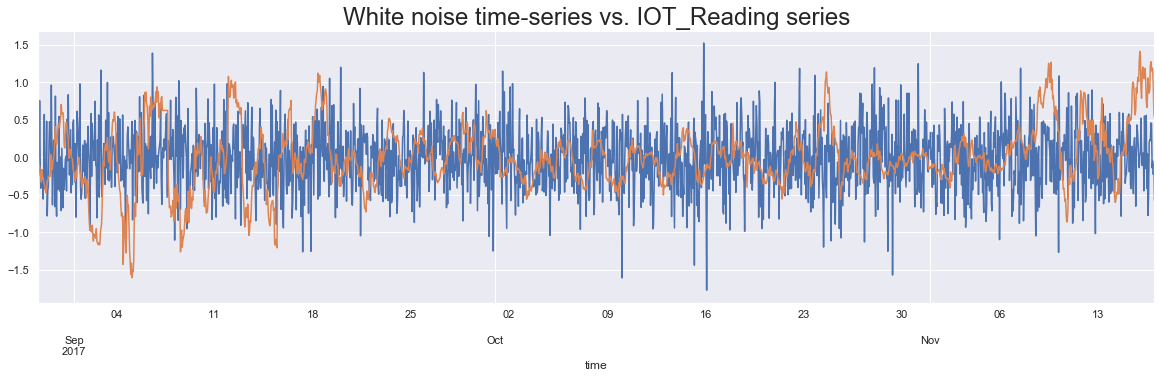

In [36]:
df_comp.wn.plot(figsize=(20,5))
df_comp.IOT_Reading.plot(figsize=(20,5))
plt.title("White noise time-series vs. IOT_Reading series", size=24)
plt.show()

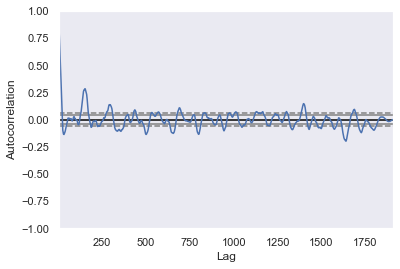

In [37]:
autocorrelation_plot(df_comp.IOT_Reading)
plt.show()

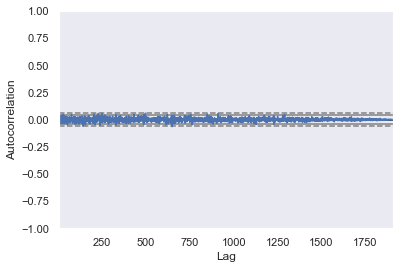

In [38]:
autocorrelation_plot(df_comp.wn)
plt.show()

## Random Walk

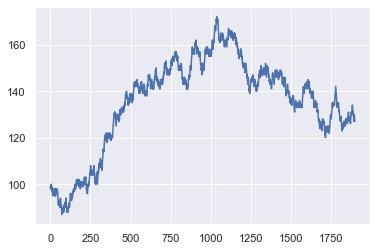

In [39]:
walk = [99]

for i in range(1900):
    # Create random noise
    noise = -1 if np.random.random() < 0.5 else 1
    walk.append(walk[-1] + noise)
    
plt.plot(walk)

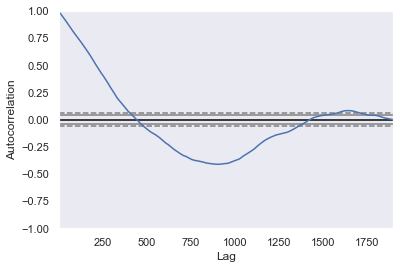

In [40]:
autocorrelation_plot(walk)
plt.show()

## Stationarity

### AD Fuller Test

In [41]:
sts.adfuller(df_comp.wn)

(-45.339029021624526,
 0.0,
 0,
 1909,
 {'1%': -3.4337801282776335,
  '5%': -2.8630552063395585,
  '10%': -2.5675766377428086},
 2148.100234743327)

In [42]:
sts.adfuller(df_comp.IOT_Reading)

(-6.1107125661239925,
 9.34765120712345e-08,
 25,
 1884,
 {'1%': -3.433825707083533,
  '5%': -2.8630753283581076,
  '10%': -2.567587351898432},
 -3174.2594240489434)

In [43]:
sts.adfuller(walk)

(-1.7914226516419844,
 0.384728347252964,
 0,
 1900,
 {'1%': -3.4337963982844437,
  '5%': -2.8630623892170872,
  '10%': -2.5675804623268697},
 5317.984799485254)

### KPSS Test

In [44]:
sts.kpss(df_comp.IOT_Reading, regression='c')

C:\Users\Owner\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


(0.704705322948274,
 0.013117697913793268,
 26,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [45]:
sts.kpss(df_comp.wn, regression='c')

C:\Users\Owner\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.029869102461911188,
 0.1,
 26,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

### Seasonality

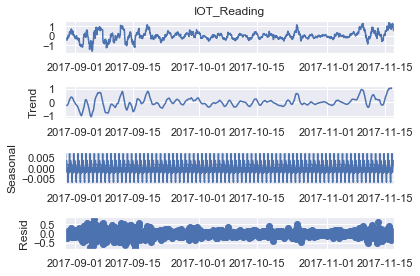

In [46]:
# Naive decomposition
# observed = Trend + Seasonal + Residual
additive = seasonal_decompose(df_comp.IOT_Reading, model='additive')
additive.plot()
plt.show()

### ACF

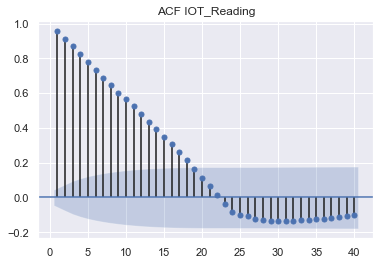

In [50]:
sgt.plot_acf(df_comp.IOT_Reading, lags=40, zero=False)
plt.title("ACF IOT_Reading")
plt.show()

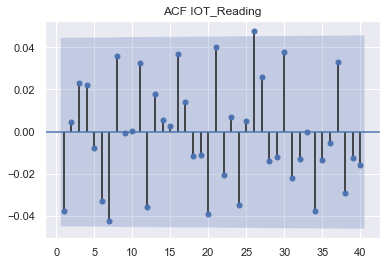

In [51]:
sgt.plot_acf(df_comp.wn, lags=40, zero=False)
plt.title("ACF White Noise")
plt.show()

### PACF

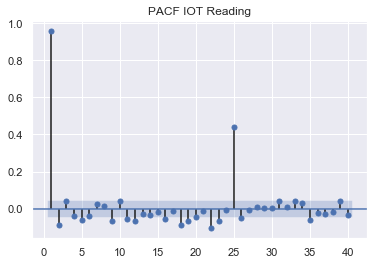

In [52]:
sgt.plot_pacf(df_comp.IOT_Reading, lags=40, zero=False, method=("ols"))
plt.title("PACF IOT Reading")
plt.show()

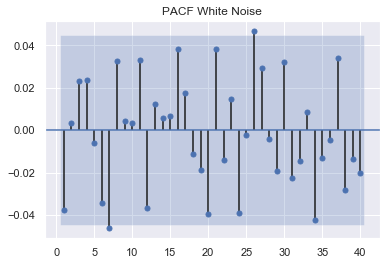

In [53]:
sgt.plot_pacf(df_comp.wn, lags=40, zero=False, method=("ols"))
plt.title("PACF White Noise")
plt.show()

### Autoregressor AR

In [54]:
# AR 1
model_ar = ARMA(df_comp.IOT_Reading, order=(1,0))
results_ar = model_ar.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            IOT_Reading   No. Observations:                 1910
Model:                     ARMA(1, 0)   Log Likelihood                1376.098
Method:                       css-mle   S.D. of innovations              0.118
Date:                Sat, 05 Mar 2022   AIC                          -2746.195
Time:                        21:10:25   BIC                          -2729.531
Sample:                    08-29-2017   HQIC                         -2740.062
                         - 11-17-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0027      0.065      0.042      0.967      -0.125       0.130
ar.L1.IOT_Reading     0.9591      0.006    149.124      0.000       0.947       0.972
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0426           +0.0000j            1.0426            0.0000
-----------------------------------------------------------------------------
"""

In [55]:
# AR 2
model_ar_2 = ARMA(df_comp.IOT_Reading, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            IOT_Reading   No. Observations:                 1910
Model:                     ARMA(2, 0)   Log Likelihood                1383.692
Method:                       css-mle   S.D. of innovations              0.117
Date:                Sat, 05 Mar 2022   AIC                          -2759.384
Time:                        21:10:28   BIC                          -2737.165
Sample:                    08-29-2017   HQIC                         -2751.207
                         - 11-17-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0017      0.060      0.029      0.977      -0.115       0.119
ar.L1.IOT_Reading     1.0445      0.023     45.846      0.000       1.000       1.089
ar.L2.IOT_Reading    -0.0890      0.023     -3.905      0.000      -0.134      -0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0517           +0.0000j            1.0517            0.0000
AR.2           10.6828           +0.0000j           10.6828            0.0000
-----------------------------------------------------------------------------
"""

In [56]:
# AR 3
model_ar_3 = ARMA(df_comp.IOT_Reading, order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            IOT_Reading   No. Observations:                 1910
Model:                     ARMA(3, 0)   Log Likelihood                1385.169
Method:                       css-mle   S.D. of innovations              0.117
Date:                Sat, 05 Mar 2022   AIC                          -2760.337
Time:                        21:15:11   BIC                          -2732.563
Sample:                    08-29-2017   HQIC                         -2750.115
                         - 11-17-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0023      0.062      0.037      0.970      -0.119       0.124
ar.L1.IOT_Reading     1.0480      0.023     45.852      0.000       1.003       1.093
ar.L2.IOT_Reading    -0.1301      0.033     -3.940      0.000      -0.195      -0.065
ar.L3.IOT_Reading     0.0394      0.023      1.719      0.086      -0.006       0.084
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0472           -0.0000j            1.0472           -0.0000
AR.2            1.1275           -4.7916j            4.9225           -0.2132
AR.3            1.1275           +4.7916j            4.9225            0.2132
-----------------------------------------------------------------------------
"""

In [57]:
# AR 4
model_ar_4 = ARMA(df_comp.IOT_Reading, order=(4,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            IOT_Reading   No. Observations:                 1910
Model:                     ARMA(4, 0)   Log Likelihood                1386.641
Method:                       css-mle   S.D. of innovations              0.117
Date:                Sat, 05 Mar 2022   AIC                          -2761.282
Time:                        21:15:13   BIC                          -2727.953
Sample:                    08-29-2017   HQIC                         -2749.016
                         - 11-17-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0016      0.060      0.028      0.978      -0.115       0.118
ar.L1.IOT_Reading     1.0495      0.023     45.920      0.000       1.005       1.094
ar.L2.IOT_Reading    -0.1351      0.033     -4.078      0.000      -0.200      -0.070
ar.L3.IOT_Reading     0.0805      0.033      2.430      0.015       0.016       0.145
ar.L4.IOT_Reading    -0.0394      0.023     -1.717      0.086      -0.084       0.006
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0519           -0.0000j            1.0519           -0.0000
AR.2           -0.9802           -2.6855j            2.8588           -0.3057
AR.3           -0.9802           +2.6855j            2.8588            0.3057
AR.4            2.9518           -0.0000j            2.9518           -0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# AR(1) Stationary

### Log Likelihood Test

In [58]:
def LLR_test(model_1, model_2, DF=1):
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [59]:
LLR_test(model_ar, model_ar_2)

0.0

In [60]:
LLR_test(model_ar_2, model_ar_3)

0.086

In [61]:
LLR_test(model_ar_3, model_ar_4)

0.086

In [62]:
df_comp['rolling_mean_IOT_Reading'] = df_comp['IOT_Reading'].rolling(window=24).mean() # window size 7 here
df_comp.tail()

,IOT_Reading,wn,rolling_mean_IOT_Reading
time,,,
2017-11-16 20:00:00,1.186376,-0.141618,1.051537
2017-11-16 21:00:00,1.182408,-0.054551,1.058811
2017-11-16 22:00:00,0.934023,-0.228400,1.044494
2017-11-16 23:00:00,0.572952,-0.100443,1.009742
2017-11-17 00:00:00,0.525338,-0.576661,0.975718


In [63]:
df_comp['rolling_mean_IOT_Reading'] = df_comp['IOT_Reading'].rolling(window=24).std() # window size 7 here
df_comp.tail()

,IOT_Reading,wn,rolling_mean_IOT_Reading
time,,,
2017-11-16 20:00:00,1.186376,-0.141618,0.199033
2017-11-16 21:00:00,1.182408,-0.054551,0.200550
2017-11-16 22:00:00,0.934023,-0.228400,0.196473
2017-11-16 23:00:00,0.572952,-0.100443,0.203214
2017-11-17 00:00:00,0.525338,-0.576661,0.213290


In [ ]:
# Expanding Window

In [64]:
df_comp['rolling_mean_IOT_Reading'] = df_comp['IOT_Reading'].expanding(min_periods=1).mean()
df_comp.rolling_mean_IOT_Reading

time
2017-08-29 11:00:00   -0.015871
2017-08-29 12:00:00   -0.058724
2017-08-29 13:00:00   -0.078563
2017-08-29 14:00:00   -0.112488
2017-08-29 15:00:00   -0.139984
                         ...   
2017-11-16 20:00:00   -0.005176
2017-11-16 21:00:00   -0.004553
2017-11-16 22:00:00   -0.004061
2017-11-16 23:00:00   -0.003759
2017-11-17 00:00:00   -0.003482
Freq: H, Name: rolling_mean_IOT_Reading, Length: 1910, dtype: float64

In [65]:
df_comp['rolling_mean_IOT_Reading'] = df_comp['IOT_Reading'].expanding(min_periods=1).std()
df_comp.rolling_mean_IOT_Reading

time
2017-08-29 11:00:00         NaN
2017-08-29 12:00:00    0.060602
2017-08-29 13:00:00    0.054928
2017-08-29 14:00:00    0.081332
2017-08-29 15:00:00    0.093497
                         ...   
2017-11-16 20:00:00    0.414839
2017-11-16 21:00:00    0.415621
2017-11-16 22:00:00    0.416067
2017-11-16 23:00:00    0.416168
2017-11-17 00:00:00    0.416235
Freq: H, Name: rolling_mean_IOT_Reading, Length: 1910, dtype: float64